In [1]:
library(dplyr)
library(DataExplorer)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




ERROR: Error in library(DataExplorer): there is no package called 'DataExplorer'


In [2]:
data <- read.csv(file="data\\adult.data", stringsAsFactors = TRUE, col.names=c("age", "workclass", "fnlwgt", "education", 
                                                       "education.num","marital.status", "occupation", "relationship", "race","sex",
                                                       "capital.gain", "capital.loss", "hours.per.week","native.country", "income"))

In [3]:
# which columns have '?' values
columns_with_question <- names(data)[sapply(data, function(col) any(col == " ?"))]

In [4]:
columns_with_question

[1] "workclass"      "occupation"     "native.country"

In [5]:
columns_with_question <- sapply(data, function(col) sum(col == ' ?') > 0)

In [6]:
for (column in names(data)[columns_with_question]) {
  data[data[[column]] == ' ?', column] <- NA
}

In [7]:
data %>% sample_n(10)

age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
38,Private,241765,11th,7,Divorced,Handlers-cleaners,Not-in-family,White,Female,0,0,60,United-States,<=50K
52,Private,158746,HS-grad,9,Never-married,Other-service,Unmarried,White,Male,0,0,40,United-States,<=50K
44,Private,199031,Some-college,10,Divorced,Transport-moving,Own-child,White,Male,0,1380,40,United-States,<=50K
42,Private,197522,Some-college,10,Separated,Machine-op-inspct,Unmarried,Black,Female,0,0,40,United-States,<=50K
54,NA,31588,HS-grad,9,Married-civ-spouse,NA,Husband,White,Male,2635,0,40,United-States,<=50K
34,Private,454508,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,65,Iran,<=50K
21,Private,191497,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,<=50K
42,Private,147251,Some-college,10,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,36,United-States,<=50K
23,Private,38707,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,60,United-States,>50K
24,Local-gov,197552,HS-grad,9,Never-married,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [8]:
names(data)[sapply(data, function(col) any(col == " ?"))]

[1] NA NA NA

In [9]:
# Missing observations?
sum(is.na(data))

#WE NEED TO FIND A METHOD TO FILL THE NANS 

[1] 4262

In [13]:
summary(data$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.00   28.00   37.00   38.58   48.00   90.00 

In [15]:
summary(data$capital.gain)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0    1078       0   99999 

In [16]:
summary(data$capital.loss)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    0.00   87.31    0.00 4356.00 

In [17]:
summary(data$hours.per.week)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   40.00   40.00   40.44   45.00   99.00 

In [18]:
table(data$workclass)
table(data$education)
table(data$marital.status)
table(data$occupation)
table(data$relationship)
table(data$race)
table(data$sex)
table(data$income)
table(data$native.country)


                ?       Federal-gov         Local-gov      Never-worked 
                0               960              2093                 7 
          Private      Self-emp-inc  Self-emp-not-inc         State-gov 
            22696              1116              2541              1297 
      Without-pay 
               14 


         10th          11th          12th       1st-4th       5th-6th 
          933          1175           433           168           333 
      7th-8th           9th    Assoc-acdm     Assoc-voc     Bachelors 
          646           514          1067          1382          5354 
    Doctorate       HS-grad       Masters     Preschool   Prof-school 
          413         10501          1723            51           576 
 Some-college 
         7291 


              Divorced      Married-AF-spouse     Married-civ-spouse 
                  4443                     23                  14976 
 Married-spouse-absent          Never-married              Separated 
                   418                  10682                   1025 
               Widowed 
                   993 


                 ?       Adm-clerical       Armed-Forces       Craft-repair 
                 0               3769                  9               4099 
   Exec-managerial    Farming-fishing  Handlers-cleaners  Machine-op-inspct 
              4066                994               1370               2002 
     Other-service    Priv-house-serv     Prof-specialty    Protective-serv 
              3295                149               4140                649 
             Sales       Tech-support   Transport-moving 
              3650                928               1597 


        Husband   Not-in-family  Other-relative       Own-child       Unmarried 
          13193            8304             981            5068            3446 
           Wife 
           1568 


 Amer-Indian-Eskimo  Asian-Pac-Islander               Black               Other 
                311                1039                3124                 271 
              White 
              27815 


 Female    Male 
  10771   21789 


 <=50K   >50K 
 24719   7841 


                          ?                    Cambodia 
                          0                          19 
                     Canada                       China 
                        121                          75 
                   Columbia                        Cuba 
                         59                          95 
         Dominican-Republic                     Ecuador 
                         70                          28 
                El-Salvador                     England 
                        106                          90 
                     France                     Germany 
                         29                         137 
                     Greece                   Guatemala 
                         29                          64 
                      Haiti          Holand-Netherlands 
                         44                           1 
                   Honduras                        Hong 
                         13   

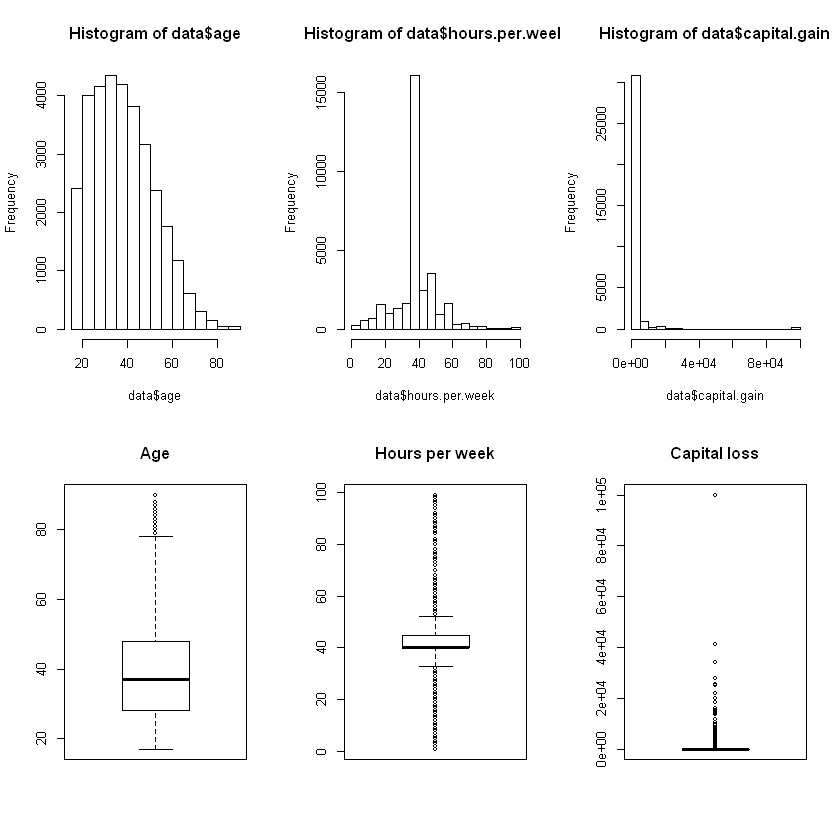

In [19]:
par(mfrow=c(2,3))
hist(data$age)
hist(data$hours.per.week)
hist(data$capital.gain)
boxplot(data$age, main="Age")
boxplot(data$hours.per.week, main="Hours per week")
boxplot(data$capital.gain, main="Capital loss")
par(mfrow=c(1,1))

In [20]:
#liczbę unikalnych wartości w każdej kolumnie 
result <- sapply(data, function(x) n_distinct(x))
result

age      workclass         fnlwgt      education  education.num 
            73              9          21647             16             16 
marital.status     occupation   relationship           race            sex 
             7             15              6              5              2 
  capital.gain   capital.loss hours.per.week native.country         income 
           119             92             94             42              2

In [21]:
data

age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
